## Module on Advanced Visualization Tools
### waffle charts and word clouds; Seaborn in pretty regression plots

In [1]:
UserPath = "/home/cerbero/"

ImportPath = UserPath+"Documents/IBM DV0101EN/02/"
ExportPath = UserPath+"Documents/IBM DV0101EN/03/"

import pandas as pd
import numpy as np
from PIL import Image

In [2]:
import os
os.listdir(ImportPath)

['Immigration to Canada - Top 5 Trend.png',
 'Immigration from Iceland to Canada over the Years - Bar Chart.png',
 'Immigration from Iceland to Canada over the Years - Bar Chart with Arrow.png',
 'Top 15 Countries in Immigration to Canada between 1980 - 2013.png',
 'Immigration to Canada - Bottom 4 Trend.png',
 'Immigration from Iceland to Canada.xlsx',
 'Histogram of 195 countries.png',
 'Canada Immigration Data.xlsx',
 'Improved Histogram of 195 countries.png']

In [3]:
df_canada = pd.read_excel(ImportPath+'Canada Immigration Data.xlsx')
df_canada = df_canada.set_index("Country")

In [4]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,35930.984615
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,92040.242971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2719.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,3718.500000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,8695.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,24973.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,699242.000000


In [5]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,2749


In [139]:
years = list(map(int, range(1980, 2014)))
print(years), print()
print ('data dimensions:', df_canada.shape)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

data dimensions: (195, 39)


In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.0


## Waffle Chart: show progress towards a goal

In [8]:
#matplotlib does not have a built-in function for waffle charts, so the IBM folks made one

In [9]:
# let's create a new dataframe for these three countries 
df_dsn = df_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,6634
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,5060
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,8599


**Code and comments below came  straight from the IBM Lab.** Good stuff.

In [10]:
#Step 1. The first step into creating a waffle chart is determing the 
#proportion of each category with respect to the total.

# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))


Denmark: 0.32691075740403097
Norway: 0.24934706549056324
Sweden: 0.4237421771054058


In [11]:
# Step 2. The second step is defining the overall size of the waffle chart.

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [12]:
#Step 3. The third step is using the proportion of each category to determe it respective number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))
#Based on the calculated proportions, Denmark will occupy 129 
#tiles of the waffle chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

Denmark: 131
Norway: 100
Sweden: 169


In [13]:
#Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [14]:
# this is the matrix
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

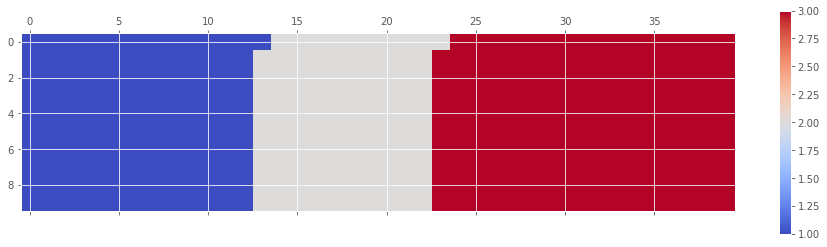

<Figure size 432x288 with 0 Axes>

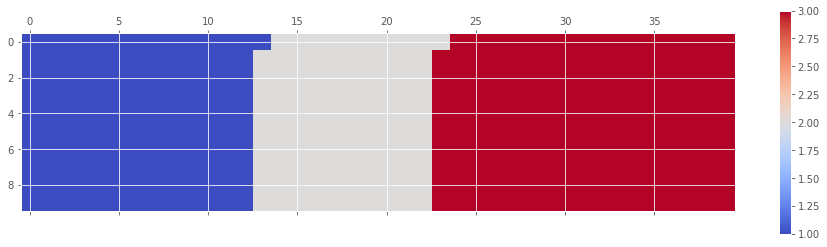

In [15]:
#As expected, the matrix consists of three categories and the total 
#number of each category's instances matches the total number of tiles allocated to each category.

#Step 5. Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

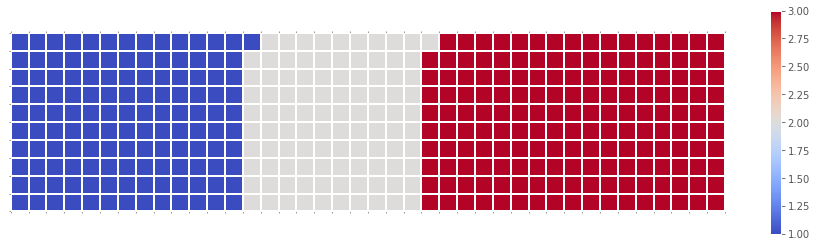

In [16]:
#Step 6. Prettify the chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


<Figure size 432x288 with 0 Axes>

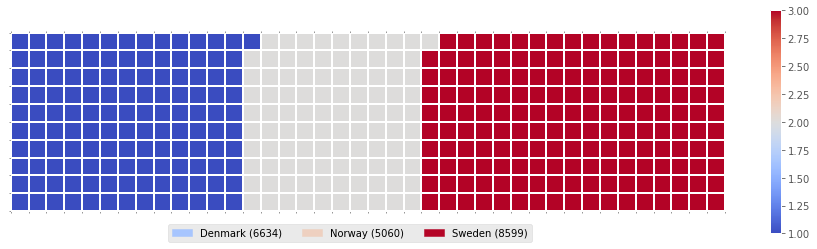

In [17]:
#Step 7. Create a legend and add it to chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [19]:
#input parameters
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 131
Norway: 100
Sweden: 169


<Figure size 432x288 with 0 Axes>

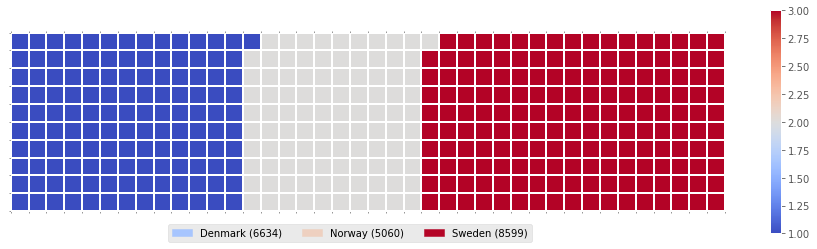

In [20]:
create_waffle_chart(categories, values, height, width, colormap)
plt.savefig(ExportPath+"Waffle Chart.png")

There seems to be a new Python package for generating waffle charts called PyWaffle, but it looks like the repository is still being built. But feel free to check it out and play with it.

In [21]:
os.listdir(ExportPath)

['Waffle Chart.png']

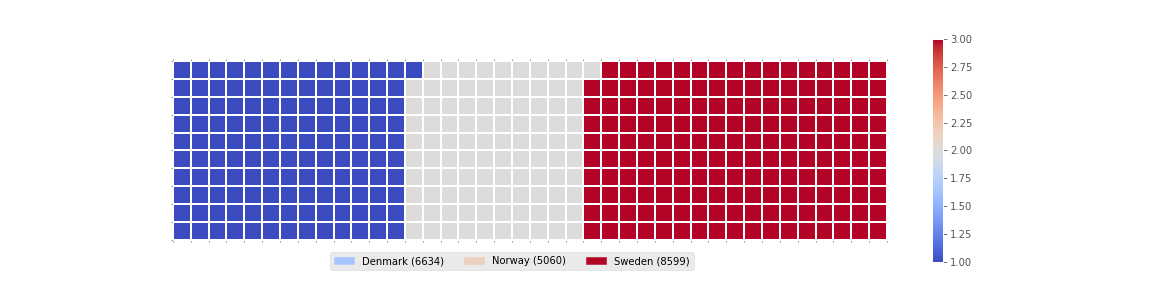

In [62]:
from IPython.display import Image as IPythonImage

IPythonImage(ExportPath+'Waffle Chart.png')

## Word Clouds: the pride and joy of every newspaper these days

https://github.com/amueller/word_cloud/

In [23]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes
# I installed it manually and this is unncessary

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [24]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

    
# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved in a variable!')

File downloaded and saved in a variable!


In [38]:
import shutil

shutil.copy('alice_novel.txt', ExportPath+'alice_novel.txt')

'/home/cerbero/Documents/IBM DV0101EN/03/alice_novel.txt'

In [39]:
alice_novel[0:1000]

"\ufeffProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is

In [40]:
stopwords = set(STOPWORDS)

In [41]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

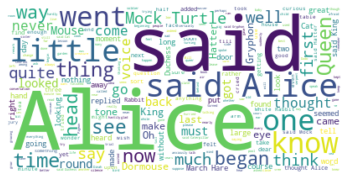

In [42]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

plt.savefig(ExportPath+"Alice Word Cloud.png")
plt.show()

In [43]:
# Oh, this is beautiful. Let's get some war text.
#http://www.gutenberg.org/ebooks/10657.txt.utf-8

In [32]:
!wget --quiet http://www.gutenberg.org/ebooks/10657.txt.utf-8

# open the file and read it into a variable alice_novel
caesar_novel = open('10657.txt.utf-8', 'r').read()
    
print ('File downloaded and saved in a variable!')

File downloaded and saved in a variable!


In [44]:
shutil.copy('10657.txt.utf-8', ExportPath+'10657.txt.utf-8')

'/home/cerbero/Documents/IBM DV0101EN/03/10657.txt.utf-8'

In [45]:
caesar_novel[0:1000]

'\ufeffThe Project Gutenberg EBook of "De Bello Gallico" and Other Commentaries\nby Caius Julius Caesar\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: "De Bello Gallico" and Other Commentaries\n\nAuthor: Caius Julius Caesar\n\nRelease Date: January 9, 2004 [EBook #10657]\n[Date last updated: January 23, 2006]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK DE BELLO GALLICO ***\n\n\n\n\nProduced by Stan Goodman, Ted Garvin, Carol David and PG Distributed\nProofreaders\n\n\n\n\n\n[Transcriber\'s Note:\n\nTypographical errors in the original have been corrected and noted\nusing the notation ** .\n\nMacrons, breves, umlauts etc have been removed from the body of the text\nsince they were very obtrusive and made reading difficult. However, they\nare retai

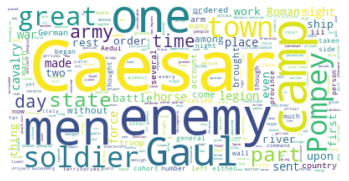

In [46]:
caesar_wc = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stopwords
)

caesar_wc.generate(caesar_novel)

plt.imshow(caesar_wc, interpolation='bilinear')
plt.axis('off')

plt.savefig(ExportPath+"Caesar Word Cloud.png")

# plt.show()
# show is not necessary here. Also, notice that the cloud below focuses on how important Caesar was

In [47]:
os.listdir(ExportPath)

['10657.txt.utf-8',
 'Alice Word Cloud.png',
 'alice_novel.txt',
 'Waffle Chart.png',
 'Caesar Word Cloud.png']

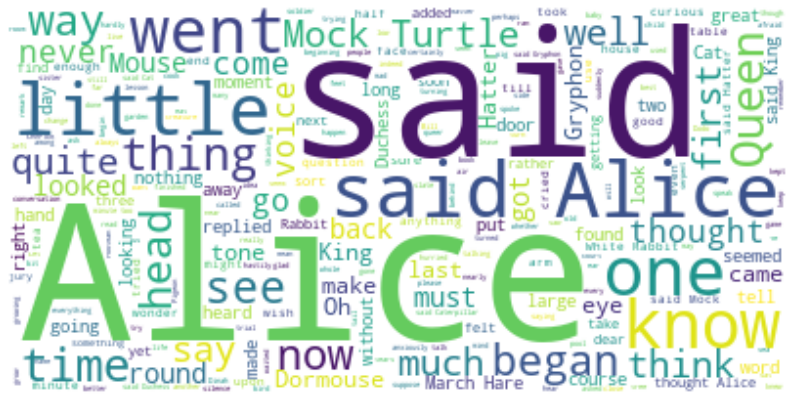

In [48]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

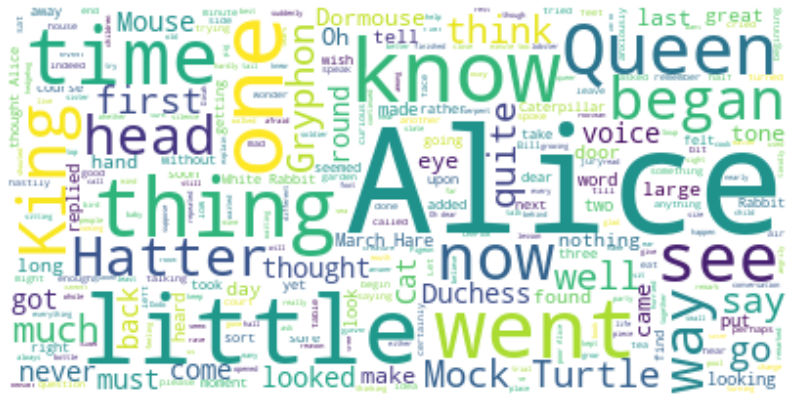

In [50]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

plt.savefig(ExportPath+"Improved Alice Word Cloud.png")


In [60]:
from PIL import Image as PILImage# converting images into arrays

# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(PILImage.open('alice_mask.png'))

shutil.copy('alice_mask.png', ExportPath+'alice_mask.png')
    
print('Image downloaded and saved!')

Image downloaded and saved!


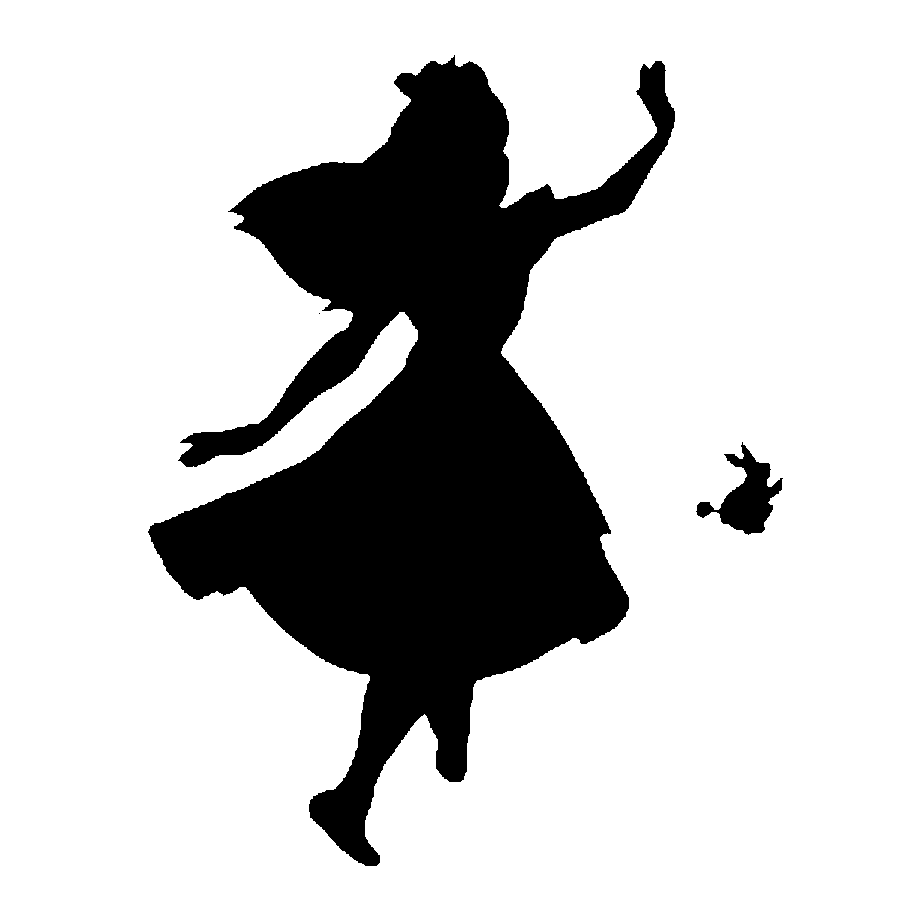

In [68]:
IPythonImage(ExportPath+'alice_mask.png')
#Ok, so I have three ways of dealing with images in this Notebook: "PILImage", "IPythonImage", and imgshow

(-0.5, 899.5, 899.5, -0.5)

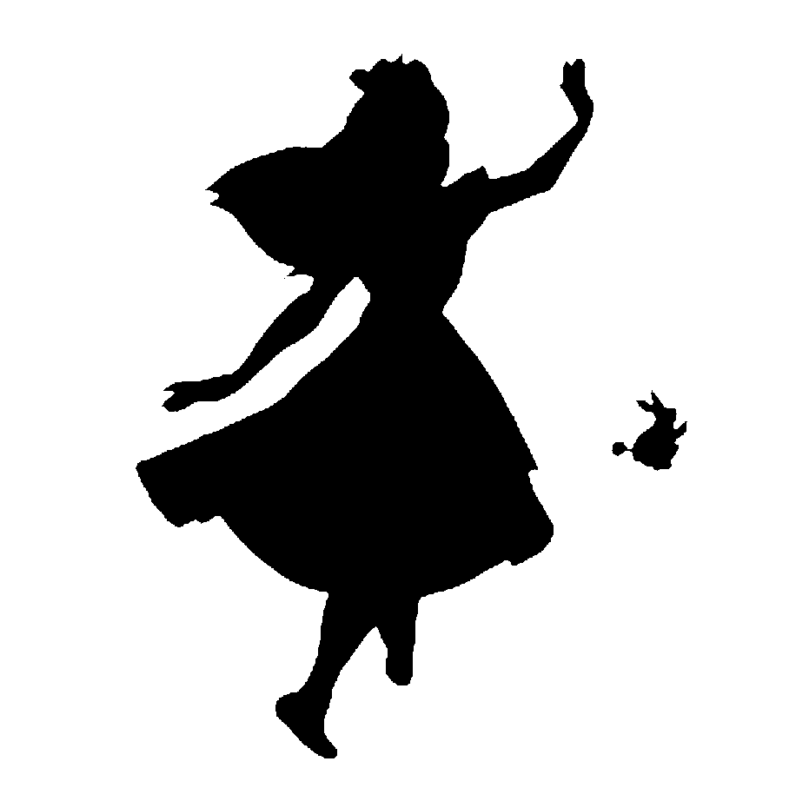

In [69]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
# plt.show()

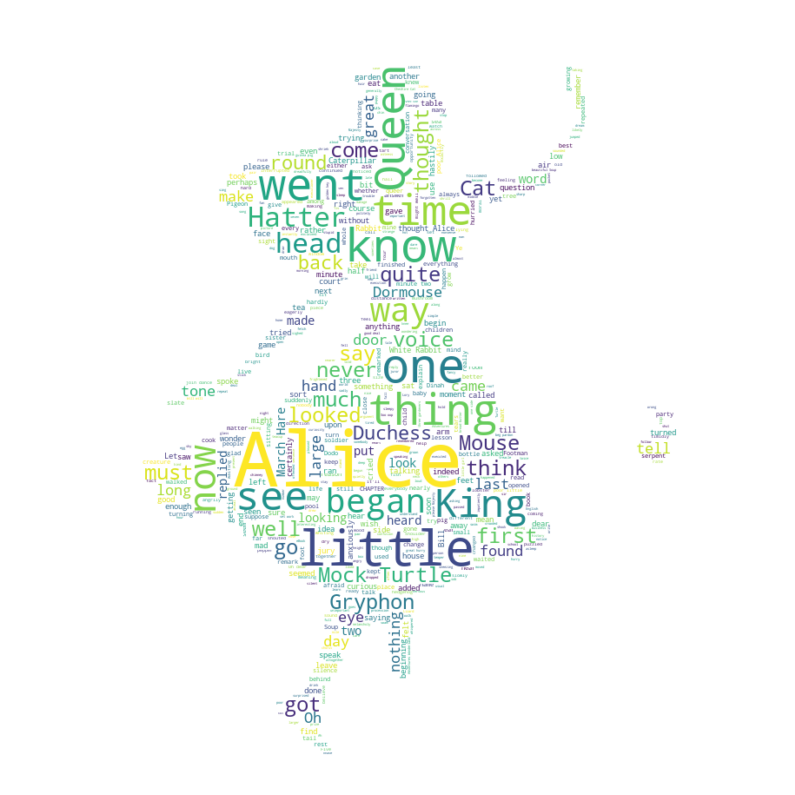

In [71]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=20000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(ExportPath+"Alice & Rabbit as Word Cloud.png")
# plt.show()

In [ ]:
# Oh, this is gorgeous. Let us get a nice Roman Eagle
# Already on ExportPath
# had to download svg as png: https://creazilla.com/sections/2-silhouettes
# and kill the transparency here: https://www.online-image-editor.com/

In [112]:
os.listdir(ExportPath)

['Alice & Rabbit as Word Cloud.png',
 '10657.txt.utf-8',
 'Other silhouette.svg',
 'Alice Word Cloud.png',
 'alice_novel.txt',
 'Caesar.png',
 'Eagle Outline',
 'Waffle Chart.png',
 'alice_mask.png',
 'Caesar Outline.png',
 'SPQR Eagle Outline',
 'Caesar-silhouette.png',
 'Improved Alice Word Cloud.png',
 'Caesar Word Cloud.png']

(-0.5, 951.5, 1919.5, -0.5)

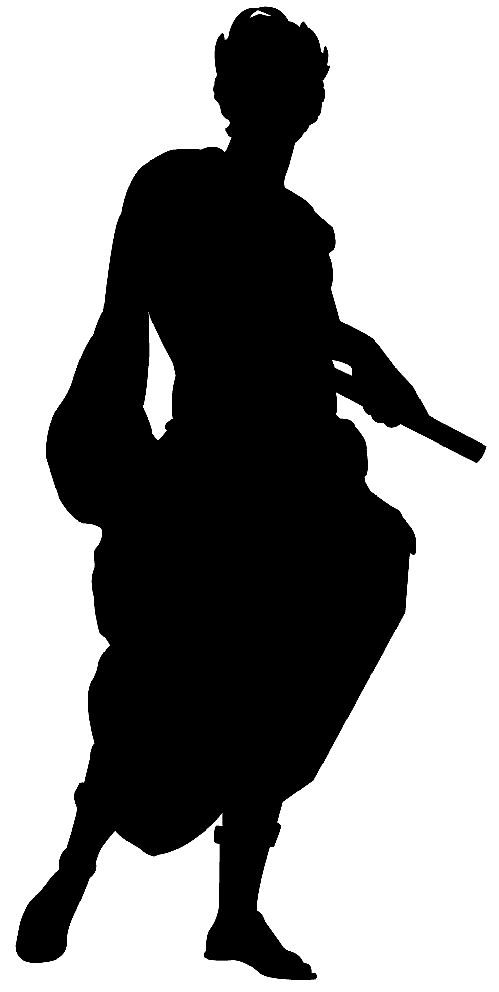

In [113]:
caesar_mask = np.array(PILImage.open(ExportPath+'Caesar.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(caesar_mask, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
# plt.show()

The code below takes a while to run

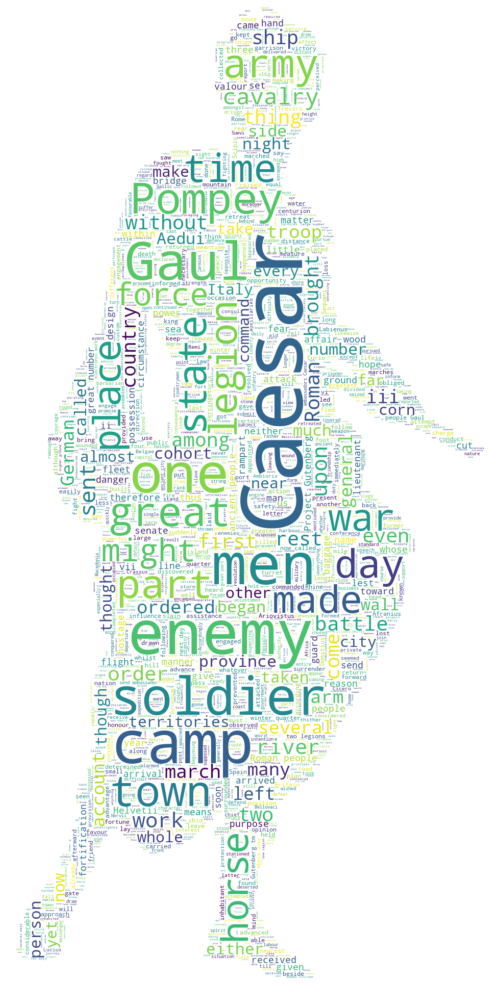

In [114]:
# instantiate a word cloud object
caesar_wc = WordCloud(background_color='white', max_words=2000, mask=caesar_mask, stopwords=stopwords)

# generate the word cloud
caesar_wc.generate(caesar_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(caesar_wc, interpolation='bilinear')
plt.axis('off')

plt.savefig(ExportPath+"Caesar as Beautiful Word Cloud.png")

In [125]:
#Word cloud with our canada text

total_immigration = df_canada['Total'].sum()
total_immigration

max_words = 90
word_string = ''
for country in df_canada.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China France Guyana Haiti India India India India India India India India Jamaica Lebanon Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Poland Romania '

In [126]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


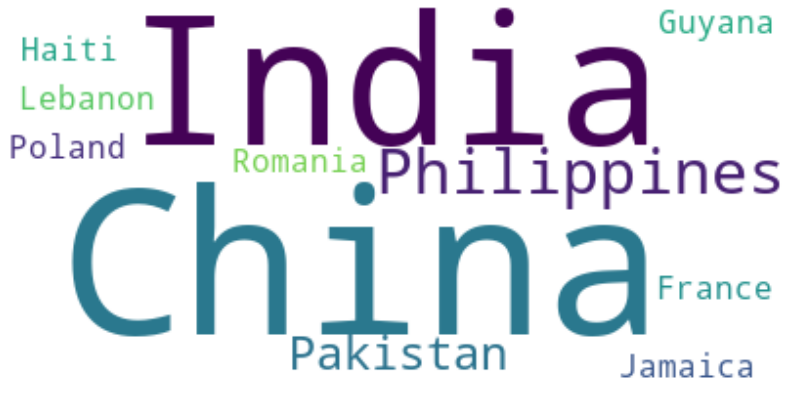

In [127]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(ExportPath+"Canada Top Immigration as Word Cloud.png")

## Regresssion Plots

In [128]:
import seaborn as sns

In [132]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,18433
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [144]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


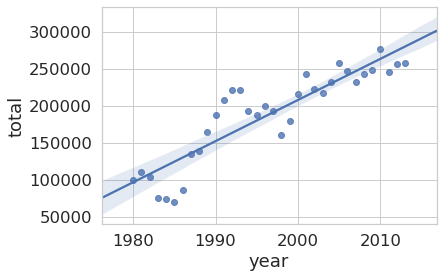

In [160]:
ax = sns.regplot(x='year', y='total', data=df_tot) # so easy!
plt.savefig(ExportPath+"Regression 01.png")

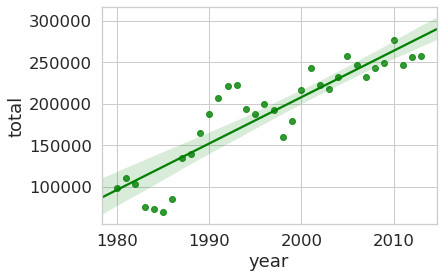

In [161]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.savefig(ExportPath+"Regression 02.png")

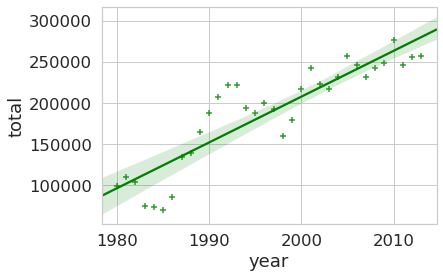

In [162]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.savefig(ExportPath+"Regression 03.png")

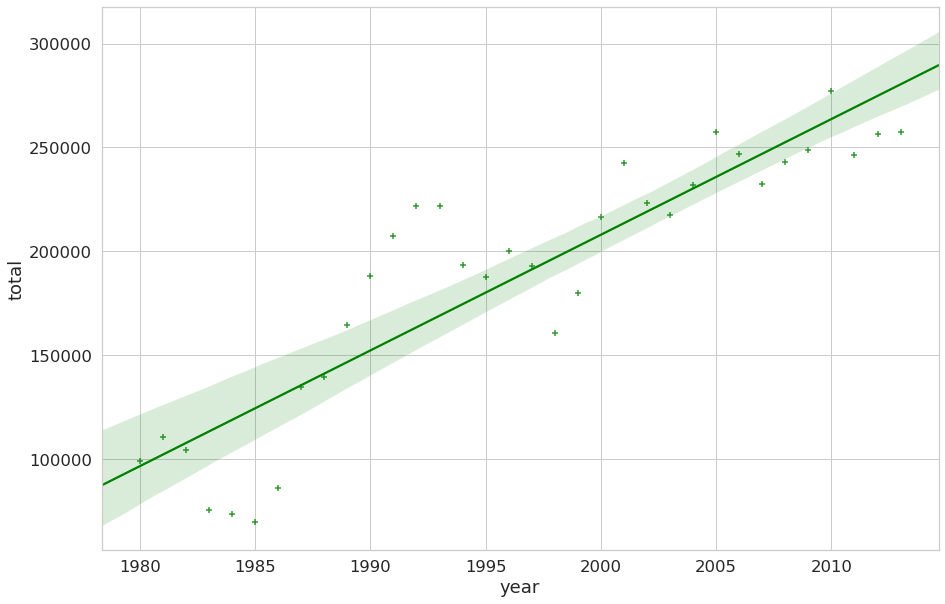

In [163]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.savefig(ExportPath+"Regression 04.png")

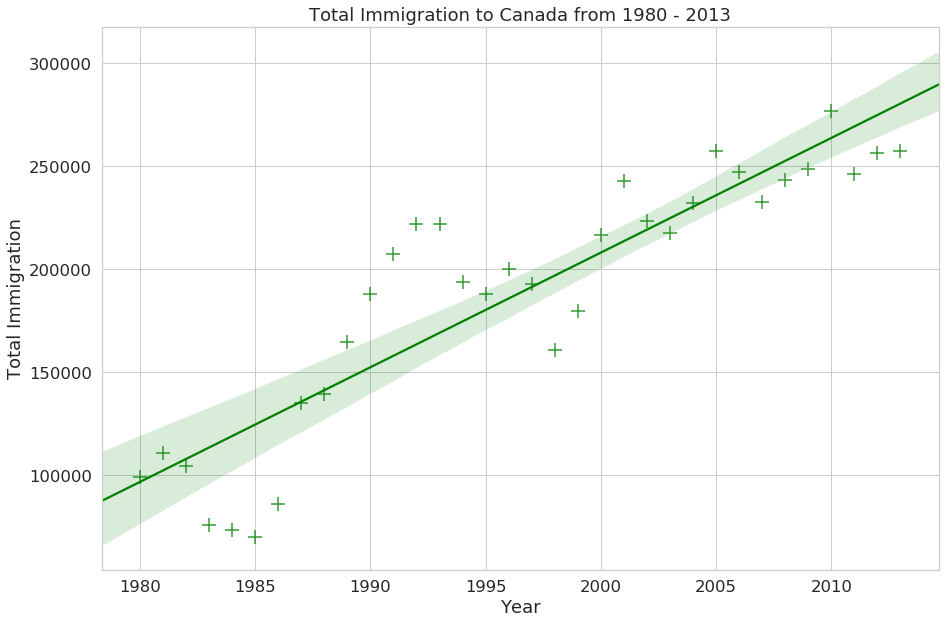

In [164]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.savefig(ExportPath+"Regression 05.png")

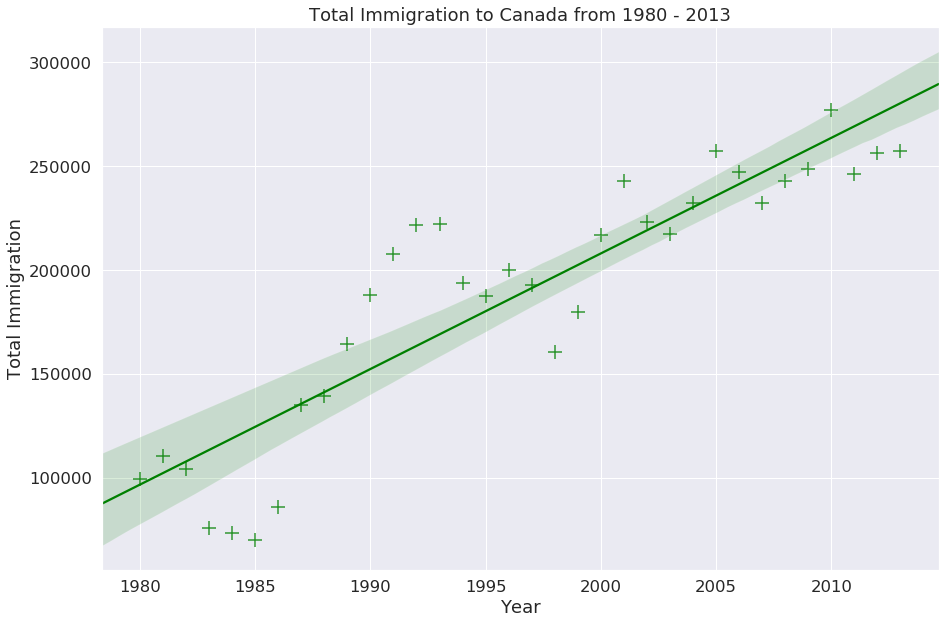

In [165]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.savefig(ExportPath+"Regression 06.png")

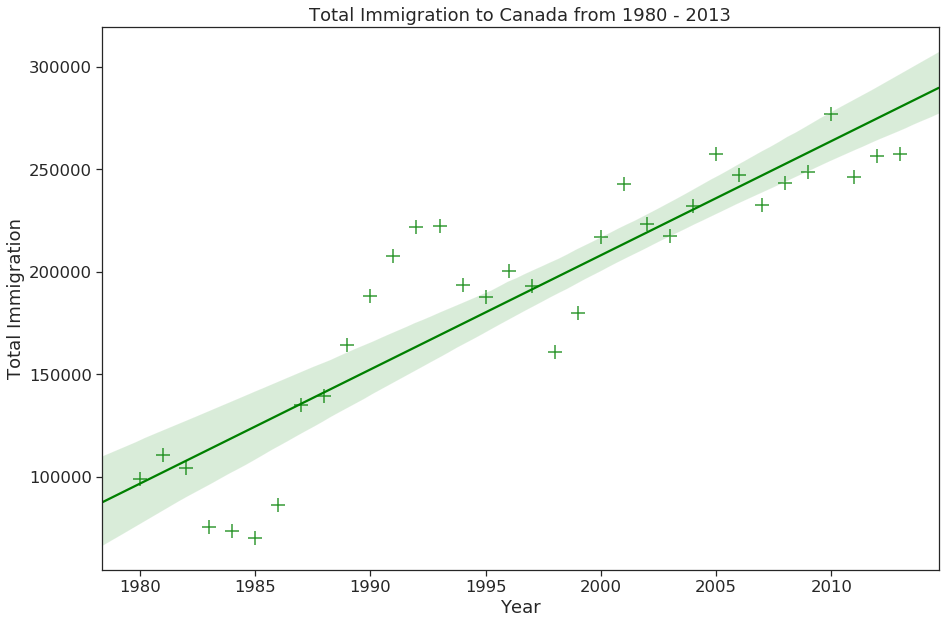

In [166]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.savefig(ExportPath+"Regression 07.png")

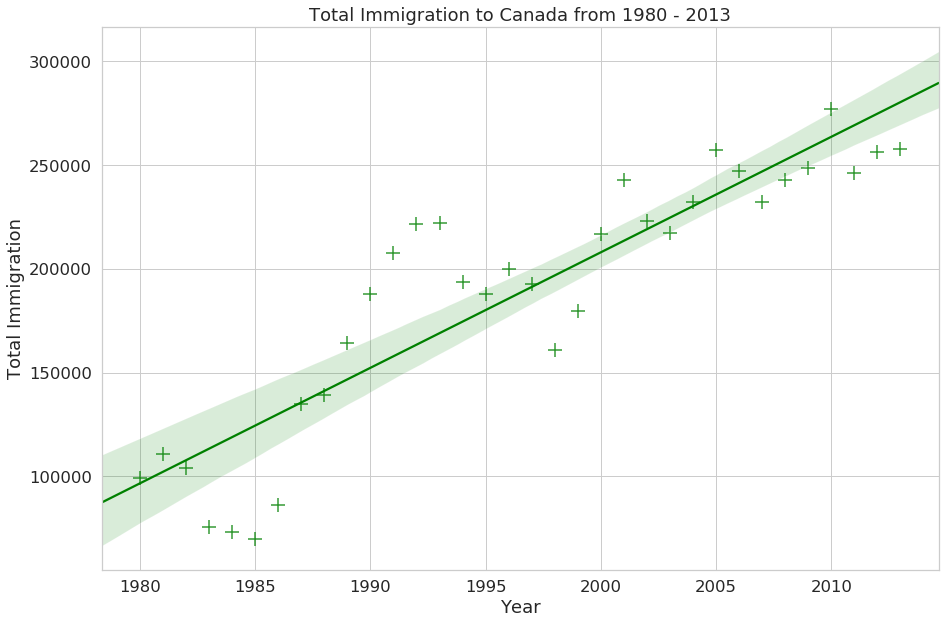

In [167]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.savefig(ExportPath+"Regression 08.png")

In [154]:
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,6634
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,5060
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,8599


In [157]:
# we can use the sum() method to get the total population per year
df_dns2 = pd.DataFrame(df_dsn[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_dns2.index = map(float, df_dns2.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_dns2.reset_index(inplace=True)

# rename columns
df_dns2.columns = ['year', 'total']

# view the final dataframe
df_dns2.head()

,year,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


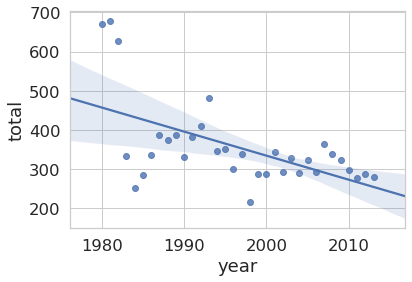

In [168]:
ax = sns.regplot(x='year', y='total', data=df_dns2) # so easy!
plt.savefig(ExportPath+"Regression Nordic Countries.png")